In [1]:
!pip install numba

In [2]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numba import cuda, jit, int32, int64

In [3]:
def vector_sum_cpu(vec):
    return np.sum(vec)


@cuda.jit
def vector_sum_gpu(vec_x, vec_y):
    idx = cuda.blockIdx.x * cuda.blockDim.x + cuda.threadIdx.x
    count = 0
    if idx <= len(vec_x):
        count += vec_x[idx] + vec_x[idx]
        cuda.atomic.add(vec_y, 0, count)
    
    
def DeviceHost(vec_x, vec_y):
    dev_x = cuda.to_device(vec_x)
    dev_y = cuda.to_device(vec_y)
    vector_sum_gpu[32, 32](dev_x, dev_y)
    vec_y = dev_y.copy_to_host()
    return vec_y

In [4]:
N = [209715, 4194304, 8388608, 16777216, 33554432, 67108864]
vector1 = np.random.randint(1, 100, N[0])
vector2 = np.random.randint(1, 100, N[1])
vector3 = np.random.randint(1, 100, N[2])
vector4 = np.random.randint(1, 100, N[3])
vector5 = np.random.randint(1, 100, N[4])
vector6 = np.random.randint(1, 100, N[5])
data = [vector1, vector2, vector3, vector4, vector5, vector6]
df = pd.DataFrame(columns=["GPU", "CPU"])


for item in range(len(data)):
  start_gpu = time.time()
  DeviceHost(data[item], np.zeros(1, dtype=np.int32))
  end_gpu = time.time() - start_gpu

  start_cpu = time.time()
  vector_sum_cpu(data[item])
  end_cpu = time.time() - start_cpu

  df = df.append({
      "GPU": end_gpu,
      "CPU": end_cpu
      }, ignore_index=True)

In [5]:
df

,GPU,CPU
0,0.755201,0.000291
1,0.006776,0.003692
2,0.011187,0.007382
3,0.020456,0.015200
4,0.038944,0.030095
5,0.141650,0.060346


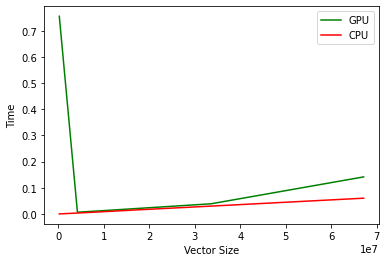

In [6]:
plt.plot(N, df["GPU"], color='green', label='GPU')
plt.plot(N, df["CPU"], color='red', label='CPU')
plt.xlabel("Vector Size")
plt.ylabel("Time")
plt.legend()
plt.show()

In [7]:
df.to_markdown()

'|    |        GPU |         CPU |\n|---:|-----------:|------------:|\n|  0 | 0.755201   | 0.000291109 |\n|  1 | 0.00677586 | 0.00369191  |\n|  2 | 0.0111866  | 0.00738192  |\n|  3 | 0.0204561  | 0.0151999   |\n|  4 | 0.038944   | 0.0300946   |\n|  5 | 0.14165    | 0.0603456   |'